In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PATH = "data/community_districts_2020.geojson"
districts = gpd.read_file(PATH)

<function matplotlib.pyplot.show(close=None, block=None)>

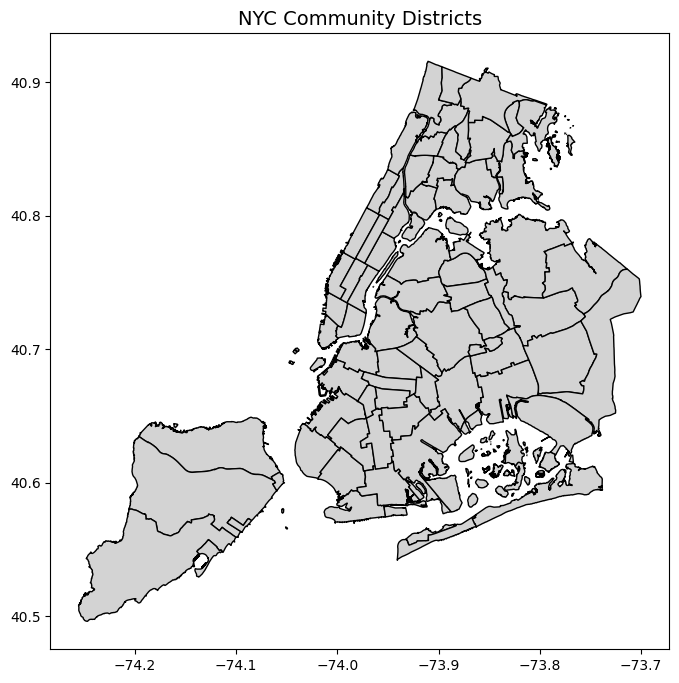

In [3]:
districts.plot(edgecolor="black", facecolor="lightgray", figsize=(8, 8))
plt.title("NYC Community Districts", fontsize=14)
plt.show

In [4]:
print(districts.head)

<bound method NDFrame.head of        shape_area cdtatype                                           cdtaname  \
0   131651030.578        0     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
1   75920724.8386        0  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...   
2   78196399.5825        0       BK03 Bedford-Stuyvesant (CD 3 Approximation)   
3   56653764.8516        0                    BK04 Bushwick (CD 4 Equivalent)   
4   165460348.959        0  BK05 East New York-Cypress Hills (CD 5 Approxi...   
..            ...      ...                                                ...   
66   122555247.48        1     QN84 Jamaica Bay (East) (JIA 84 Approximation)   
67  377284308.264        0                 SI01 North Shore (CD 1 Equivalent)   
68  606169353.335        0               SI02 Mid-Island (CD 2 Approximation)   
69    595417026.8        0              SI03 South Shore (CD 3 Approximation)   
70  44747669.9575        1  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...  

In [5]:
districts["join"] = districts["cdta2020"].str[-2:] + " " + districts["boroname"].str.upper()

In [6]:
counts = pd.read_csv("data/nyc_2024_rodents_by_board.csv")

In [7]:
counts["join"] = counts["Community Board"].str.upper().str.strip()

In [8]:
merged = districts.merge(counts[["join","Incident Count"]], on="join", how="left")
merged["Incident Count"] = merged["Incident Count"].fillna(0)

In [9]:
print(merged.head)

<bound method NDFrame.head of        shape_area cdtatype                                           cdtaname  \
0   131651030.578        0     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
1   75920724.8386        0  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...   
2   78196399.5825        0       BK03 Bedford-Stuyvesant (CD 3 Approximation)   
3   56653764.8516        0                    BK04 Bushwick (CD 4 Equivalent)   
4   165460348.959        0  BK05 East New York-Cypress Hills (CD 5 Approxi...   
..            ...      ...                                                ...   
66   122555247.48        1     QN84 Jamaica Bay (East) (JIA 84 Approximation)   
67  377284308.264        0                 SI01 North Shore (CD 1 Equivalent)   
68  606169353.335        0               SI02 Mid-Island (CD 2 Approximation)   
69    595417026.8        0              SI03 South Shore (CD 3 Approximation)   
70  44747669.9575        1  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...  

<function matplotlib.pyplot.show(close=None, block=None)>

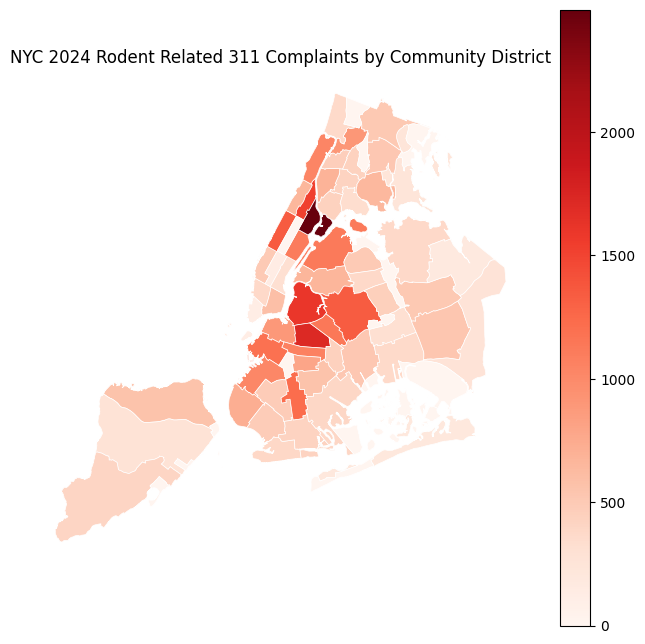

In [13]:
rat_map = merged.plot(column="Incident Count", cmap="Reds", legend=True,
                 edgecolor="white", linewidth=0.5, figsize=(8,8))
rat_map.set_axis_off()
rat_map.set_title("NYC 2024 Rodent Related 311 Complaints by Community District")
plt.show